# Binary Classification on Adult Dataset

In this notebook, we explore the Adult dataset and train a simple binary classifier.

In [1]:
import numpy as np
import pandas as pd
import gamchanger as gc

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from interpret import show
from interpret.glassbox import ExplainableBoostingClassifier

%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
    sep=', ',
    engine='python',
    header=None
)

column_names = [
    'Age', 'WorkClass', 'fnlwgt', 'Education', 'EducationNum',
    'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Gender',
    'CapitalGain', 'CapitalLoss', 'HoursPerWeek', 'NativeCountry', 'Income'
]
df.columns = [n.lower() for n in column_names]

df.shape

(32561, 15)

In [3]:
df['target'] = [0 if l else 1 for l in (df['income'] == '<=50K')]

In [4]:
train_cols = df.columns[0:-2]
label = df.columns[-1]
x = df[train_cols]
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
ebm = ExplainableBoostingClassifier(n_jobs=-1)
ebm.fit(x_train, y_train)

ExplainableBoostingClassifier(feature_names=['age', 'workclass', 'fnlwgt',
                                             'education', 'educationnum',
                                             'maritalstatus', 'occupation',
                                             'relationship', 'race', 'gender',
                                             'capitalgain', 'capitalloss',
                                             'hoursperweek', 'nativecountry',
                                             'relationship x hoursperweek',
                                             'workclass x race',
                                             'age x relationship',
                                             'age x hoursperweek',
                                             'fnlwgt x education',
                                             'maritalstatus x hoursperweek',
                                             '...
                              feature_types=['continuous', 'categorical',


In [7]:
y_pred = ebm.predict(x_test)

## ML Error Analysis Dashboard

In this dashboard, we interactively diagnose a binary classification model trained on the Adult dataset.

In [8]:
# Step 1: Specify our interested feature

# Let's explore age feature first
cur_feature = 'age'

In [9]:
def draw_error_hist(cur_feature):
    false_index = np.where(y_test != y_pred)[0]
    true_index = np.where(y_test == y_pred)[0]

    plt.hist(x_test.iloc[false_index, :][cur_feature], alpha=0.5, density=True, label='Wrong', bins=30)
    plt.hist(x_test.iloc[true_index, :][cur_feature], alpha=0.5, density=True, label='Correct', bins=30)

    plt.legend(loc='upper right')
    plt.title('Correct v.s. Wrong Classifications across {}'.format(str.capitalize(cur_feature)))
    plt.show()

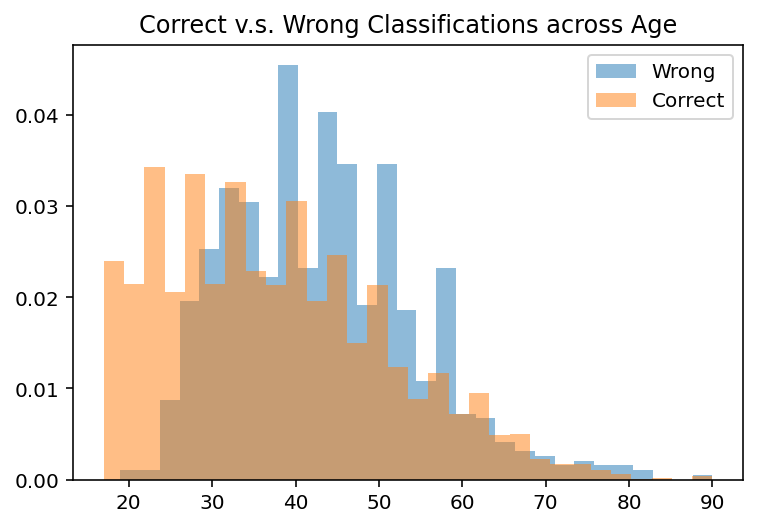

In [10]:
draw_error_hist(cur_feature)

In [11]:
# Step 2: Specify a select query

# Here we focus on mis-classified samples

interseted_index = np.where(
    np.logical_and(
        x_test[cur_feature] >= 62,
        y_test != y_pred
    )
)[0].tolist()

log = 'The query has {} results.'
print(log.format(len(interseted_index)))

The query has 48 results.


In [12]:
x_test.iloc[interseted_index, :].head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry
26560,74,Self-emp-inc,167537,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,35,United-States
1282,65,?,36039,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States
3580,63,Private,106023,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
15971,63,Self-emp-not-inc,179981,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States
27100,71,?,177906,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States


In [15]:
ebm_local = ebm.explain_local(x_test.to_numpy()[interseted_index, :],
                              y_test.to_numpy()[interseted_index],
                              name='EBM')

show(ebm_local)

<!-- http://127.0.0.1:7001/5047675920/ -->

In [14]:
gc.visualize(ebm, x_train[:1000], y_train[:1000])

<iframe
 srcdoc="<!DOCTYPE html><html lang="en"><head><meta charset='utf-8'><meta name='viewport' content='width = device-width, initial-scale = 1'><title>GAM Changer</title><style>html,body{position:relative;width:100%;height:100%}body{color:#333;margin:0;padding:0;box-sizing:border-box;font-family:-apple-system,BlinkMacSystemFont,"Segoe UI",Roboto,Oxygen-Sans,Ubuntu,Cantarell,"Helvetica Neue",sans-serif}a{color:rgb(0,100,200);text-decoration:none}a:hover{text-decoration:underline}a:visited{color:rgb(0,80,160)}label{display:block}input,button,select,textarea{font-family:inherit;font-size:inherit;-webkit-padding:0.4em 0;padding:0.4em;margin:0 0 0.5em 0;box-sizing:border-box;border:1px solid #ccc;border-radius:2px}input:disabled{color:#ccc}</style><script defer src='data:text/javascript;base64,IWZ1bmN0aW9uKHQsZSl7Im9iamVjdCI9PXR5cGVvZiBleHBvcnRzJiYidW5kZWZpbmVkIiE9dHlwZW9mIG1vZHVsZT9tb2R1bGUuZXhwb3J0cz1lKCk6ImZ1bmN0aW9uIj09dHlwZW9mIGRlZmluZSYmZGVmaW5lLmFtZD9kZWZpbmUoZSk6KHQ9InVuZGVmaW5lZCIhPXR5cGVvZiBnbG9iYWxUaGlzP2dsb2JhbFRoaXM6dHx8c2VsZikuYXBwPWUoKX0odGhpcywoZnVuY3Rpb24oKXsidXNlIHN0cmljdCI7ZnVuY3Rpb24gdCgpe31jb25zdCBlPXQ9PnQ7ZnVuY3Rpb24gYSh0KXtyZXR1cm4gdCgpfWZ1bmN0aW9uIG4oKXtyZXR1cm4gT2JqZWN0LmNyZWF0ZShudWxsKX1mdW5jdGlvbiBBKHQpe3QuZm9yRWFjaChhKX1mdW5jdGlvbiBpKHQpe3JldHVybiJmdW5jdGlvbiI9PXR5cGVvZiB0fWZ1bmN0aW9uIHIodCxlKXtyZXR1cm4gdCE9dD9lPT1lOnQhPT1lfHx0JiYib2JqZWN0Ij09dHlwZW9mIHR8fCJmdW5jdGlvbiI9PXR5cGVvZiB0fWZ1bmN0aW9uIGwoZSxhLG4pe2UuJCQub25fZGVzdHJveS5wdXNoKGZ1bmN0aW9uKGUsLi4uYSl7aWYobnVsbD09ZSlyZXR1cm4gdDtjb25zdCBuPWUuc3Vic2NyaWJlKC4uLmEpO3JldHVybiBuLnVuc3Vic2NyaWJlPygpPT5uLnVuc3Vic2NyaWJlKCk6bn0oYSxuKSl9ZnVuY3Rpb24gbyh0KXtyZXR1cm4gbnVsbD09dD8iIjp0fWNvbnN0IHM9InVuZGVmaW5lZCIhPXR5cGVvZiB3aW5kb3c7bGV0IGM9cz8oKT0+d2luZG93LnBlcmZvcm1hbmNlLm5vdygpOigpPT5EYXRlLm5vdygpLGc9cz90PT5yZXF1ZXN0QW5pbWF0aW9uRnJhbWUodCk6dDtjb25zdCB1PW5ldyBTZXQ7ZnVuY3Rpb24gZCh0KXt1LmZvckVhY2goKGU9PntlLmModCl8fCh1LmRlbGV0ZShlKSxlLmYoKSl9KSksMCE9PXUuc2l6ZSYmZyhkKX1mdW5jdGlvbiBoKHQpe2xldCBlO3JldHVybiAwPT09dS5zaXplJiZnKGQpLHtwcm9taXNlOm5ldyBQcm9taXNlKChhPT57dS5hZGQoZT17Yzp0LGY6YX0pfSkpLGFib3J0KCl7dS5kZWxldGUoZSl9fX1mdW5jdGlvbiBwKHQsZSl7dC5hcHBlbmRDaGlsZChlKX1mdW5jdGlvbiBmKHQsZSxhKXtjb25zdCBuPUkodCk7aWYoIW4uZ2V0RWxlbWVudEJ5SWQoZSkpe2NvbnN0IHQ9RSgic3R5bGUiKTt0LmlkPWUsdC50ZXh0Q29udGVudD1hLEIobix0KX19ZnVuY3Rpb24gSSh0KXtpZighdClyZXR1cm4gZG9jdW1lbnQ7Y29uc3QgZT10LmdldFJvb3ROb2RlP3QuZ2V0Um9vdE5vZGUoKTp0Lm93bmVyRG9jdW1lbnQ7cmV0dXJuIGUuaG9zdD9lOmRvY3VtZW50fWZ1bmN0aW9uIEIodCxlKXtwKHQuaGVhZHx8dCxlKX1mdW5jdGlvbiBDKHQsZSxhKXt0Lmluc2VydEJlZm9yZShlLGF8fG51bGwpfWZ1bmN0aW9uIG0odCl7dC5wYXJlbnROb2RlLnJlbW92ZUNoaWxkKHQpfWZ1bmN0aW9uIEUodCl7cmV0dXJuIGRvY3VtZW50LmNyZWF0ZUVsZW1lbnQodCl9ZnVuY3Rpb24gUSh0KXtyZXR1cm4gZG9jdW1lbnQuY3JlYXRlRWxlbWVudE5TKCJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIsdCl9ZnVuY3Rpb24geSh0KXtyZXR1cm4gZG9jdW1lbnQuY3JlYXRlVGV4dE5vZGUodCl9ZnVuY3Rpb24geCgpe3JldHVybiB5KCIgIil9ZnVuY3Rpb24gdigpe3JldHVybiB5KCIiKX1mdW5jdGlvbiB3KHQsZSxhLG4pe3JldHVybiB0LmFkZEV2ZW50TGlzdGVuZXIoZSxhLG4pLCgpPT50LnJlbW92ZUV2ZW50TGlzdGVuZXIoZSxhLG4pfWZ1bmN0aW9uIGIodCxlLGEpe251bGw9PWE/dC5yZW1vdmVBdHRyaWJ1dGUoZSk6dC5nZXRBdHRyaWJ1dGUoZSkhPT1hJiZ0LnNldEF0dHJpYnV0ZShlLGEpfWZ1bmN0aW9uIEQodCxlKXtlPSIiK2UsdC53aG9sZVRleHQhPT1lJiYodC5kYXRhPWUpfWZ1bmN0aW9uIGsodCxlKXt0LnZhbHVlPW51bGw9PWU/IiI6ZX1mdW5jdGlvbiBNKHQsZSxhLG4pe3Quc3R5bGUuc2V0UHJvcGVydHkoZSxhLG4/ImltcG9ydGFudCI6IiIpfWZ1bmN0aW9uIFModCxlLGEpe3QuY2xhc3NMaXN0W2E/ImFkZCI6InJlbW92ZSJdKGUpfWZ1bmN0aW9uIEcodCxlLGE9ITEpe2NvbnN0IG49ZG9jdW1lbnQuY3JlYXRlRXZlbnQoIkN1c3RvbUV2ZW50Iik7cmV0dXJuIG4uaW5pdEN1c3RvbUV2ZW50KHQsYSwhMSxlKSxufWNsYXNzIE57Y29uc3RydWN0b3IoKXt0aGlzLmU9dGhpcy5uPW51bGx9Yyh0KXt0aGlzLmgodCl9bSh0LGUsYT1udWxsKXt0aGlzLmV8fCh0aGlzLmU9RShlLm5vZGVOYW1lKSx0aGlzLnQ9ZSx0aGlzLmModCkpLHRoaXMuaShhKX1oKHQpe3RoaXMuZS5pbm5lckhUTUw9dCx0aGlzLm49QXJyYXkuZnJvbSh0aGlzLmUuY2hpbGROb2Rlcyl9aSh0KXtmb3IobGV0IGU9MDtlPHRoaXMubi5sZW5ndGg7ZSs9MSlDKHRoaXMudCx0aGlzLm5bZV0sdCl9cCh0KXt0aGlzLmQoKSx0aGlzLmgodCksdGhpcy5pKHRoaXMuYSl9ZCgpe3RoaXMubi5mb3JFYWNoKG0pfX1jb25zdCBMPW5ldyBTZXQ7bGV0IFIs